In [1]:
import json
import numpy as np

import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rcParams['figure.dpi'] = 100
mpl.rcParams['font.family'] = 'DeJavu Serif'

In [2]:
sample_change = {'memory':[100], 'context':[100]}
conflicts = {step:json.load(open(f'Data/Hyperparameter/mix=20_samples={step}0.json')) for step in range(1, 11)}
for version in ['memory', 'context']:
    for step in range(2, 11):
        change = [conflicts[step-1][str(idx)][version] != conflicts[step][str(idx)][version] for idx in range(len(conflicts[1]))]
        sample_change[version].append(np.mean(change)*100)
        
for idx in range(10):
    print(f'# observations = {(idx+1)*10} | memory change = {sample_change["memory"][idx]:.1f}% | context change = {sample_change["context"][idx]:.1f}%')

# observations = 10 | memory change = 100.0% | context change = 100.0%
# observations = 20 | memory change = 37.5% | context change = 31.6%
# observations = 30 | memory change = 21.9% | context change = 15.5%
# observations = 40 | memory change = 15.4% | context change = 10.3%
# observations = 50 | memory change = 12.5% | context change = 7.5%
# observations = 60 | memory change = 9.9% | context change = 5.9%
# observations = 70 | memory change = 8.1% | context change = 5.2%
# observations = 80 | memory change = 6.9% | context change = 4.5%
# observations = 90 | memory change = 5.9% | context change = 4.1%
# observations = 100 | memory change = 5.4% | context change = 3.4%


In [3]:
mixes = [1, 2, 5, 10, 20, 50, 100]
mix_change = {'memory':[100], 'context':[100]}
conflicts = {mix:json.load(open(f'Data/Hyperparameter/mix={mix}_samples=100.json')) for mix in mixes}
for version in ['memory', 'context']:
    for mid in range(1, len(mixes)):
        change = [conflicts[mixes[mid-1]][str(idx)][version] != conflicts[mixes[mid]][str(idx)][version] for idx in range(len(conflicts[1]))]
        mix_change[version].append(np.mean(change)*100)

for idx in range(len(mixes)):
    print(f'# paraphrases = {mixes[idx]} | memory change = {mix_change["memory"][idx]:.1f}% | context change = {mix_change["context"][idx]:.1f}%')

# paraphrases = 1 | memory change = 100.0% | context change = 100.0%
# paraphrases = 2 | memory change = 48.5% | context change = 45.5%
# paraphrases = 5 | memory change = 21.7% | context change = 18.5%
# paraphrases = 10 | memory change = 20.0% | context change = 15.8%
# paraphrases = 20 | memory change = 19.2% | context change = 13.1%
# paraphrases = 50 | memory change = 19.0% | context change = 13.5%
# paraphrases = 100 | memory change = 19.1% | context change = 13.5%


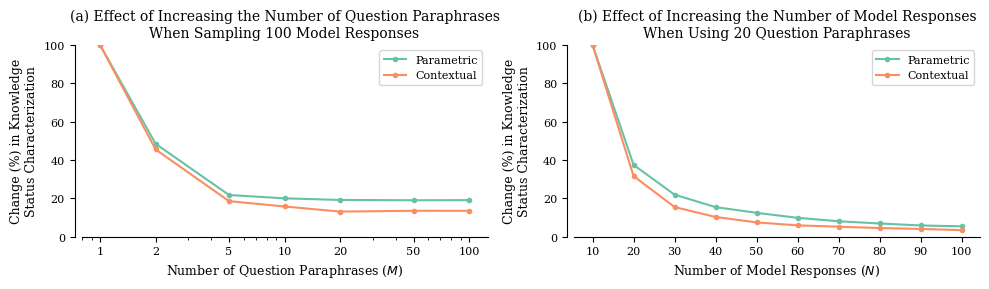

In [17]:
fontsize = 9
colors = sns.color_palette('Set2', 2)

num_row, num_col = 1, 2
size_row, size_col = 3, 5
fig, axs = plt.subplots(num_row, num_col, figsize=(num_col*size_col, num_row*size_row))

sns.despine(ax=axs[0], offset=dict(left=5))
for vid, version in enumerate(['Memory', 'Context']):
    axs[0].plot(mixes, mix_change[version.lower()], color=colors[vid], marker='.',
                label='Parametric' if version == 'Memory' else 'Contextual')
axs[0].set_xscale('log')
axs[0].set_xlabel('Number of Question Paraphrases ($M$)', fontsize=fontsize)
axs[0].set_ylabel('Change (%) in Knowledge\nStatus Characterization', fontsize=fontsize)
axs[0].set_xticks(mixes)
axs[0].set_xticklabels(mixes)
axs[0].set_ylim(0, 100)
axs[0].tick_params(axis='both', which='major', labelsize=fontsize-1)
axs[0].set_title('(a) Effect of Increasing the Number of Question Paraphrases\nWhen Sampling 100 Model Responses', fontsize=fontsize+1)
axs[0].legend(fontsize=fontsize-1, loc=1)

sns.despine(ax=axs[1], offset=dict(left=5))
for vid, version in enumerate(['Memory', 'Context']):
    axs[1].plot(range(1, 11), sample_change[version.lower()], color=colors[vid], marker='.',
                label='Parametric' if version == 'Memory' else 'Contextual')
axs[1].set_ylabel('Change (%) in Knowledge\nStatus Characterization', fontsize=fontsize)
axs[1].set_xlabel('Number of Model Responses ($N$)', fontsize=fontsize)
axs[1].set_xticks(range(1, 11))
axs[1].set_xticklabels([num*10 for num in range(1, 11)])
axs[1].set_ylim(0, 100)
axs[1].tick_params(axis='both', which='major', labelsize=fontsize-1)
axs[1].set_title('(b) Effect of Increasing the Number of Model Responses\nWhen Using 20 Question Paraphrases', fontsize=fontsize+1)
axs[1].legend(fontsize=fontsize-1, loc=1)

plt.tight_layout()
plt.savefig(f'Figure/hyperparameter.pdf', bbox_inches='tight')
plt.show()
plt.close(fig)